In [1]:
import csv
import geopandas as gpd
import pandas as pd

In [2]:
strava_data = pd.read_csv('StravaInitial.csv')

In [3]:
strava_spatial=gpd.read_file("SpatialStrava.shp")

In [4]:
from shapely.geometry import Polygon,MultiLineString

In [5]:
import fiona

In [29]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
areas = gpd.read_file('MORA Recreational Areas.kml', driver='KML')

In [7]:
strava_data.head()

,edge_uid,activity_type,date,forward_trip_count,reverse_trip_count,forward_people_count,reverse_people_count,forward_hour_0_trip_count,reverse_hour_0_trip_count,forward_hour_1_trip_count,...,forward_20_34_people_count,reverse_20_34_people_count,forward_35_54_people_count,reverse_35_54_people_count,forward_55_64_people_count,reverse_55_64_people_count,forward_65_plus_people_count,reverse_65_plus_people_count,forward_average_speed,reverse_average_speed
0,234840350,Run,2019-08-07,5,5,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.308373,2.862130
1,234999265,Run,2019-07-01,0,5,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.784611
2,234999265,Run,2019-09-20,0,5,0,5,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.455862
3,234788887,Run,2019-08-07,0,5,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.440183,3.163285
4,234788887,Run,2019-08-19,5,0,5,0,0,0,0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,2.704982,2.962593


In [8]:
strava_spatial.head()

,edgeUID,osmId,geometry
0,234755321,12223662,"LINESTRING (-122.54480 46.94327, -122.54481 46..."
1,234755812,12240847,"LINESTRING (-122.54358 47.00713, -122.54409 47..."
2,234780154,12239097,"LINESTRING (-122.80158 47.20983, -122.80183 47..."
3,234780394,12230758,"LINESTRING (-122.83373 47.26970, -122.83358 47..."
4,234780803,12195709,"LINESTRING (-122.72126 47.22406, -122.72304 47..."


In [9]:
strava_data = strava_data.rename(columns={'edge_uid': 'edgeUID'})

In [10]:
strava_data.head()

,edgeUID,activity_type,date,forward_trip_count,reverse_trip_count,forward_people_count,reverse_people_count,forward_hour_0_trip_count,reverse_hour_0_trip_count,forward_hour_1_trip_count,...,forward_20_34_people_count,reverse_20_34_people_count,forward_35_54_people_count,reverse_35_54_people_count,forward_55_64_people_count,reverse_55_64_people_count,forward_65_plus_people_count,reverse_65_plus_people_count,forward_average_speed,reverse_average_speed
0,234840350,Run,2019-08-07,5,5,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.308373,2.862130
1,234999265,Run,2019-07-01,0,5,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.784611
2,234999265,Run,2019-09-20,0,5,0,5,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.455862
3,234788887,Run,2019-08-07,0,5,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.440183,3.163285
4,234788887,Run,2019-08-19,5,0,5,0,0,0,0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,2.704982,2.962593


In [11]:
strava_spatial = strava_spatial.merge(strava_data, on='edgeUID')

In [12]:
strava_spatial.head()

,edgeUID,osmId,geometry,activity_type,date,forward_trip_count,reverse_trip_count,forward_people_count,reverse_people_count,forward_hour_0_trip_count,...,forward_20_34_people_count,reverse_20_34_people_count,forward_35_54_people_count,reverse_35_54_people_count,forward_55_64_people_count,reverse_55_64_people_count,forward_65_plus_people_count,reverse_65_plus_people_count,forward_average_speed,reverse_average_speed
0,234803032,12237544,"LINESTRING (-122.52124 47.26618, -122.52123 47...",Run,2019-09-19,5,0,5,0,0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.622154,0.000000
1,234806068,407588603,"LINESTRING (-122.44329 47.14553, -122.44335 47...",Run,2019-07-21,5,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.609338,0.000000
2,234806068,407588603,"LINESTRING (-122.44329 47.14553, -122.44335 47...",Run,2019-09-04,5,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.192312,0.000000
3,234830774,261315684,"LINESTRING (-122.51449 47.27402, -122.51508 47...",Run,2019-07-29,5,0,5,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.326646,0.000000
4,234830774,261315684,"LINESTRING (-122.51449 47.27402, -122.51508 47...",Run,2019-07-23,5,0,5,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.765676,2.850083


<AxesSubplot:>

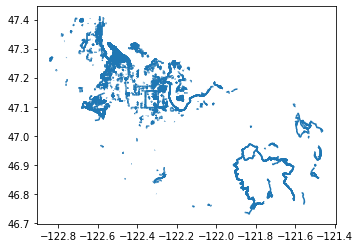

In [13]:
strava_spatial.plot()

<AxesSubplot:>

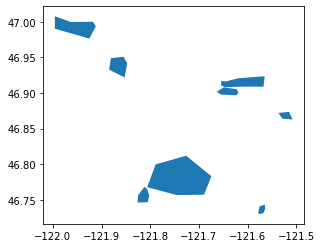

In [14]:
areas.plot()

<AxesSubplot:>

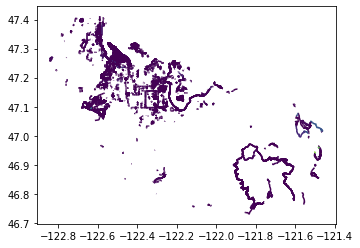

In [15]:
strava_spatial.plot(column='forward_trip_count')

In [16]:
import matplotlib.pyplot as plt

<AxesSubplot:>

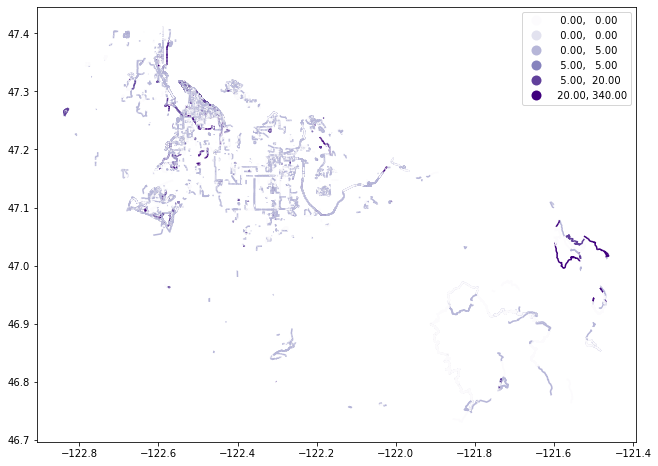

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))
strava_spatial.plot(column='forward_trip_count', ax=ax, legend=True,cmap='Purples',scheme='percentiles',figsize=(25, 20))

In [18]:
strava_spatial = strava_spatial.to_crs(epsg=4326)

In [19]:
areas = areas.to_crs(epsg=4326)

<AxesSubplot:>

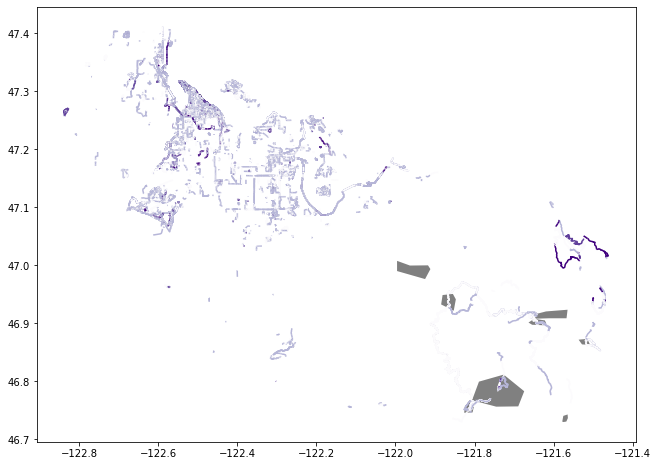

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))
base = areas.plot(ax=ax,color='grey')
strava_spatial.plot(column='forward_trip_count', ax=base,cmap='Purples',scheme='percentiles')

In [21]:
import contextily as ctx

<ipython-input-22-9196f89880a1>:4: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  ctx.add_basemap(ax,url=ctx.providers.Stamen.TonerLite,zoom=5)


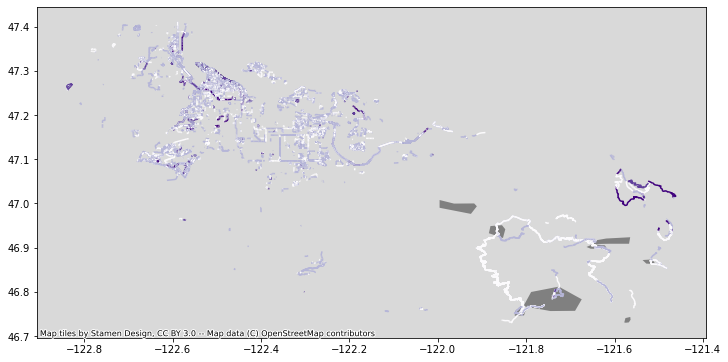

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))
base = areas.plot(ax=ax,color='grey')
strava_spatial.plot(column='forward_trip_count', ax=base,cmap='Purples',scheme='percentiles')
ctx.add_basemap(ax,url=ctx.providers.Stamen.TonerLite,zoom=5)

In [23]:
polygon = Polygon([(-122.1,46.7), (-122.1, 47.1), (-121.4, 47.1), (-121.4, 46.7), (-122.1,46.7)])
poly_gdf = gpd.GeoDataFrame([1], geometry=[polygon], crs=4326)

<AxesSubplot:>

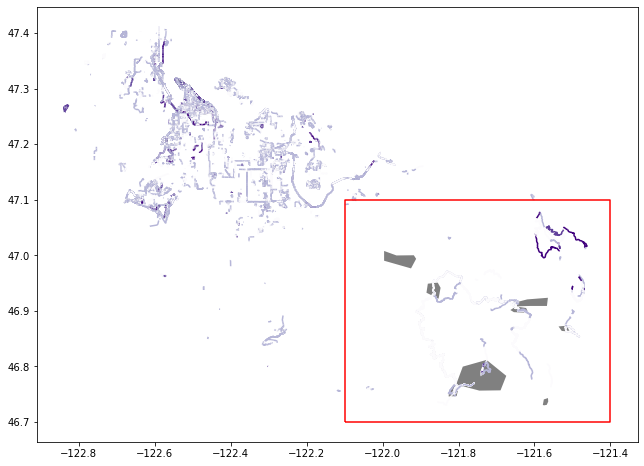

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))
base = areas.plot(ax=ax,color='grey')
strava_spatial.plot(column='forward_trip_count', ax=base,cmap='Purples',scheme='percentiles')
poly_gdf.boundary.plot(ax=base, color="red")

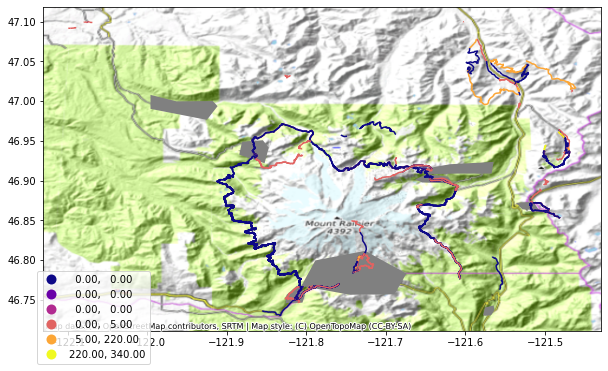

In [25]:
counts_clipped = gpd.clip(strava_spatial, polygon)
fig, ax = plt.subplots(figsize=(10, 6))
base = areas.plot(ax=ax,color='grey')
counts_clipped.plot(column='forward_trip_count', ax=base,cmap='plasma',scheme='percentiles',legend='True')
ctx.add_basemap(ax,crs=4326,source=ctx.providers.OpenTopoMap,zoom=10)
leg = ax.get_legend()
leg.set_bbox_to_anchor((0., 0., 0.2, 0.2))

In [26]:
ctx.providers.keys()

dict_keys(['OpenStreetMap', 'OpenSeaMap', 'OpenPtMap', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Thunderforest', 'OpenMapSurfer', 'Hydda', 'MapBox', 'Stamen', 'Esri', 'OpenWeatherMap', 'HERE', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'Wikimedia', 'GeoportailFrance', 'OneMapSG'])

In [35]:
list(strava_spatial.columns)

['edgeUID',
 'osmId',
 'geometry',
 'activity_type',
 'date',
 'forward_trip_count',
 'reverse_trip_count',
 'forward_people_count',
 'reverse_people_count',
 'forward_hour_0_trip_count',
 'reverse_hour_0_trip_count',
 'forward_hour_1_trip_count',
 'reverse_hour_1_trip_count',
 'forward_hour_2_trip_count',
 'reverse_hour_2_trip_count',
 'forward_hour_3_trip_count',
 'reverse_hour_3_trip_count',
 'forward_hour_4_trip_count',
 'reverse_hour_4_trip_count',
 'forward_hour_5_trip_count',
 'reverse_hour_5_trip_count',
 'forward_hour_6_trip_count',
 'reverse_hour_6_trip_count',
 'forward_hour_7_trip_count',
 'reverse_hour_7_trip_count',
 'forward_hour_8_trip_count',
 'reverse_hour_8_trip_count',
 'forward_hour_9_trip_count',
 'reverse_hour_9_trip_count',
 'forward_hour_10_trip_count',
 'reverse_hour_10_trip_count',
 'forward_hour_11_trip_count',
 'reverse_hour_11_trip_count',
 'forward_hour_12_trip_count',
 'reverse_hour_12_trip_count',
 'forward_hour_13_trip_count',
 'reverse_hour_13_trip_co

In [41]:
strava_spatial['gender_dif'] = strava_spatial.forward_female_people_count-strava_spatial.forward_male_people_count

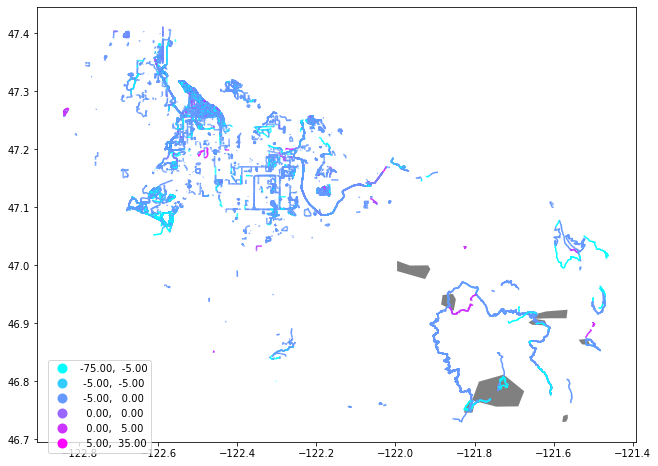

In [42]:
fig, ax = plt.subplots(figsize=(12, 8))
base = areas.plot(ax=ax,color='grey')
strava_spatial.plot(column='gender_dif', ax=base,cmap='cool',scheme='percentiles',legend="True")
leg = ax.get_legend()
leg.set_bbox_to_anchor((0., 0., 0.2, 0.2))

In [31]:
strava_spatial['gender_percent_dif'] = (strava_spatial.forward_female_people_count-strava_spatial.forward_male_people_count)/strava_spatial.forward_people_count

In [46]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

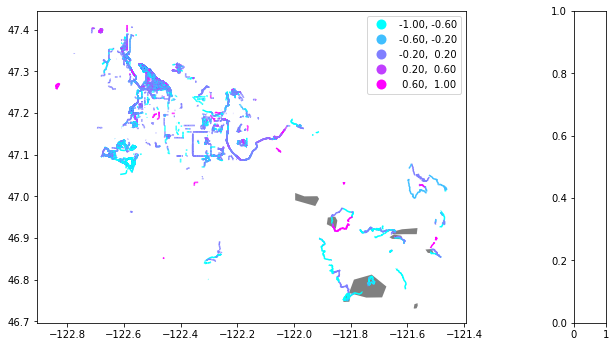

In [52]:
fig, ax = plt.subplots(figsize=(12, 8))
base = areas.plot(ax=ax,color='grey')
divider = make_axes_locatable(base)

strava_spatial.plot(column='gender_percent_dif', ax=base, cmap='cool',scheme='equalinterval',legend="True",cax=cax)
cax = divider.append_axes("right", size="5%", pad=0.1)

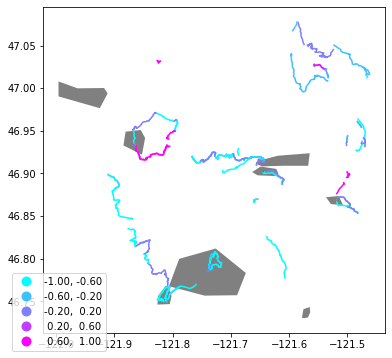

In [54]:
counts_clipped = gpd.clip(strava_spatial, polygon)
fig, ax = plt.subplots(figsize=(10, 6))
base = areas.plot(ax=ax,color='grey')
counts_clipped.plot(column='gender_percent_dif', ax=base,cmap='cool',scheme='equalinterval',legend='True')
leg = ax.get_legend()
leg.set_bbox_to_anchor((0., 0., 0.2, 0.2))

In [28]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
entrances = gpd.read_file('MORA Park Entrances.kml', driver='KML')

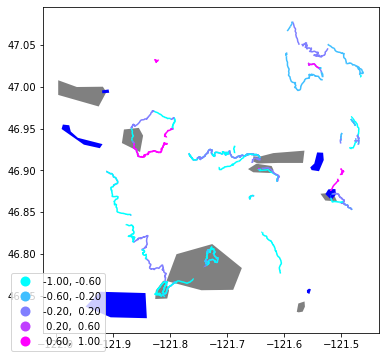

In [32]:
counts_clipped = gpd.clip(strava_spatial, polygon)
fig, ax = plt.subplots(figsize=(10, 6))
base = areas.plot(ax=ax,color='grey')
ent =entrances.plot(ax=base,color="blue")
counts_clipped.plot(column='gender_percent_dif', ax=base,cmap='cool',scheme='equalinterval',legend='True')
leg = ax.get_legend()
leg.set_bbox_to_anchor((0., 0., 0.2, 0.2))